Valeurs manquantes dans movies.csv:
movieId    0
title      0
genres     0
dtype: int64

Valeurs manquantes dans ratings.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Valeurs manquantes dans tags.csv:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


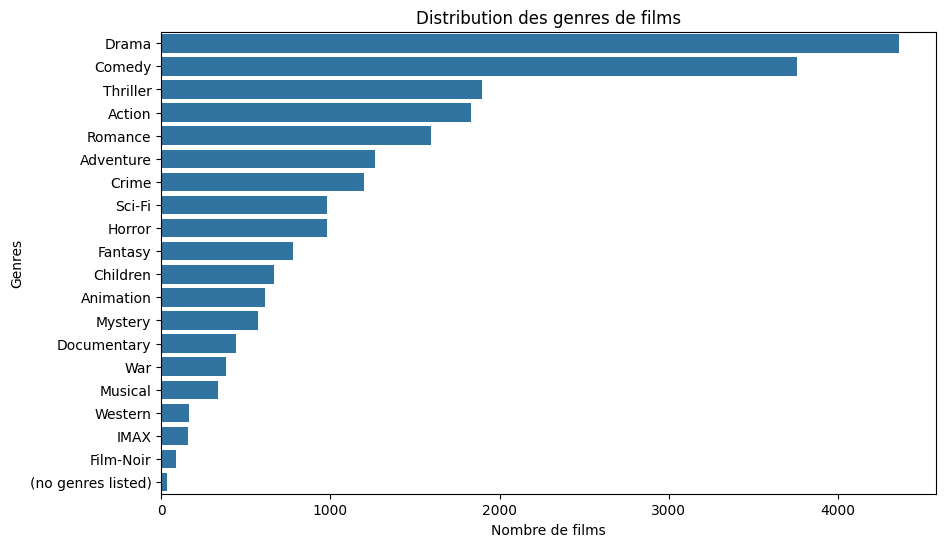

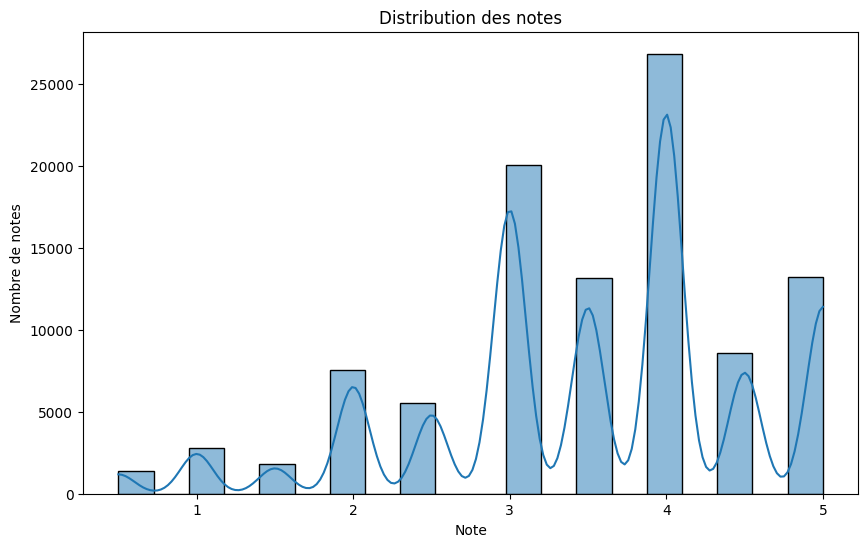

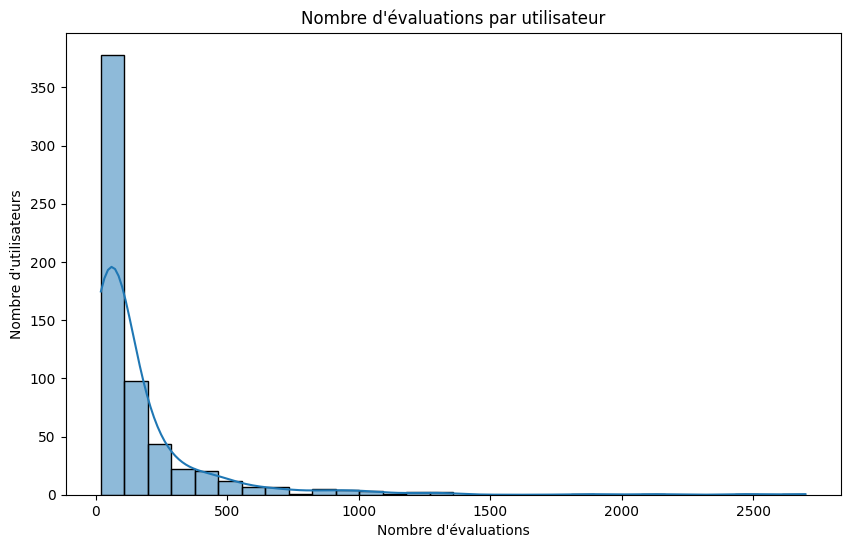


Statistiques descriptives des évaluations:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Top 10 des films les mieux notés:
   movieId  rating                                      title
0    88448     5.0      Paper Birds (Pájaros de papel) (2010)
1   100556     5.0                 Act of Killing, The (2012)
2   143031     5.0                            Jump In! (2007)
3   143511     5.0                               Human (2015)
4   143559     5.0                        L.A. Slasher (2015)
5     6201     5.0                           Lady Jane (1986)
6   102217     5.0             Bill Hicks: Revelations (1993)
7   102084     5.0               Justice League: Doom (2012) 
8     6192     5.0  Open Hearts (Elsker dig for evigt) (2002)
9   145994     5.0                     Formula of Love (1984)

Nombre moyen de tags par 

In [3]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les datasets
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
tags = pd.read_csv('data/tags.csv')

# Vérifier les valeurs manquantes
print("Valeurs manquantes dans movies.csv:")
print(movies.isnull().sum())
print("\nValeurs manquantes dans ratings.csv:")
print(ratings.isnull().sum())
print("\nValeurs manquantes dans tags.csv:")
print(tags.isnull().sum())

# Supprimer les tags vides
tags.dropna(subset=['tag'], inplace=True)

# Distribution des genres de films
genres_exploded = movies['genres'].str.split('|').explode()
plt.figure(figsize=(10, 6))
sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index)
plt.title('Distribution des genres de films')
plt.xlabel('Nombre de films')
plt.ylabel('Genres')
plt.show()

# Distribution des notes
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=20, kde=True)
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de notes')
plt.show()

# Fréquence des évaluations par utilisateur
user_ratings_count = ratings.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=30, kde=True)
plt.title('Nombre d\'évaluations par utilisateur')
plt.xlabel('Nombre d\'évaluations')
plt.ylabel('Nombre d\'utilisateurs')
plt.show()

# Ajouter des statistiques descriptives
print("\nStatistiques descriptives des évaluations:")
print(ratings['rating'].describe())

print("\nTop 10 des films les mieux notés:")
top_movies = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
top_movies = top_movies.reset_index().merge(movies[['movieId', 'title']], on='movieId')
print(top_movies)

# Nombre moyen de tags par utilisateur
tags_per_user = tags.groupby('userId').size()
print("\nNombre moyen de tags par utilisateur:")
print(tags_per_user.mean())

